Importing the libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from pprint import pprint

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


Exploratory Data Analysis

In [2]:
dataframe = pd.read_csv('Housing.csv')

# printing first 5 columns
print(dataframe.head())

# printing the dimensions of the dataframe
print(dataframe.shape)

# Checking for missing values
print(dataframe.isnull().sum())

#data info
print(dataframe.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)
price               0
area                0
bedrooms            0
bathrooms           0
s

Feature Engineering

In [3]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
dataframe['mainroad'] = label_encoder.fit_transform(dataframe['mainroad'])
dataframe['guestroom'] = label_encoder.fit_transform(dataframe['guestroom'])
dataframe['basement'] = label_encoder.fit_transform(dataframe['basement'])
dataframe['hotwaterheating'] = label_encoder.fit_transform(dataframe['hotwaterheating'])
dataframe['airconditioning'] = label_encoder.fit_transform(dataframe['airconditioning'])
dataframe['prefarea'] = label_encoder.fit_transform(dataframe['prefarea'])
dataframe['furnishingstatus'] = ordinal_encoder.fit_transform(dataframe[['furnishingstatus']])

Histogram for the distribution

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

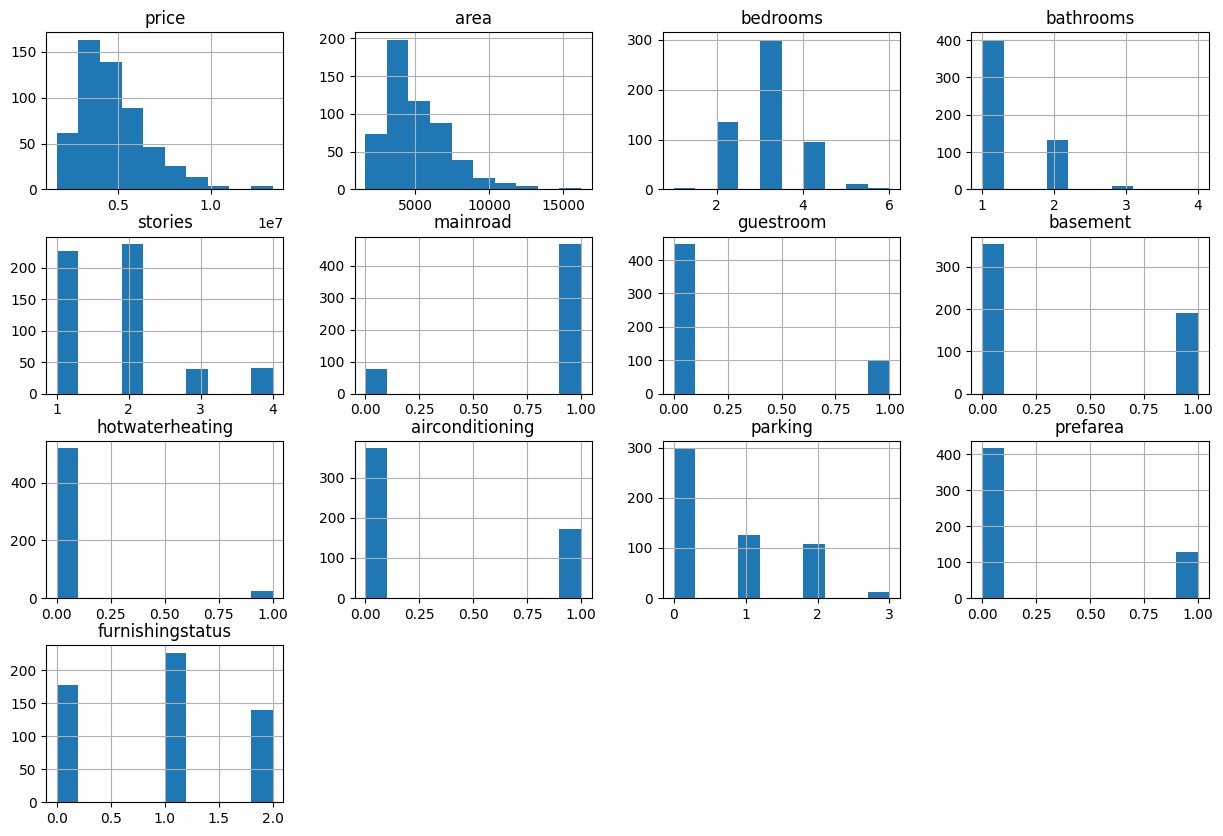

In [4]:
dataframe.hist(figsize=(15,10))

HeatMap for Correlation

<Axes: >

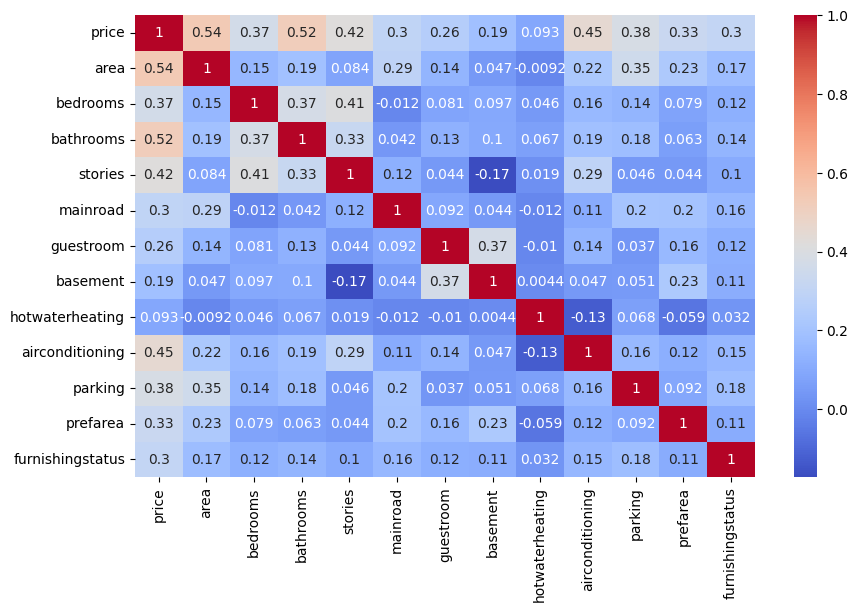

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')

Splitting training & testing data

In [6]:
X = dataframe.drop(['price'],axis=1)
Y = dataframe["price"]
print(X)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=69)


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

Feature Scaling

In [7]:
scalar = StandardScaler()
scalar.fit(train_x.values)
std_train_x = scalar.transform(train_x.values)
std_test_x = scalar.transform(test_x.values)

Linear Regression

In [8]:
model1 = LinearRegression()
model1.fit(std_train_x, train_y)
predict_y_model1 = model1.predict(std_train_x)

# R squared error for Linear Regression
score_model1_1 = metrics.r2_score(train_y, predict_y_model1)
print("R squared error for Linear Regression: ", score_model1_1)

# Mean Absolute Error for Linear Regression
score_model1_2 = metrics.mean_absolute_error(train_y, predict_y_model1)
print('Mean Absolute Error for Linear Regression: ', score_model1_2)

# Mean Squared Error for Linear Regression
score_model1_3 = metrics.mean_squared_error(train_y, predict_y_model1)
print('Mean Squared Error for Linear Regression: ', score_model1_3)

R squared error for Linear Regression:  0.703731459665081
Mean Absolute Error for Linear Regression:  730458.4318636303
Mean Squared Error for Linear Regression:  909681965974.8025


Random Forest Regressor with Hyperparameter Tuning

In [9]:
model2 = RandomForestRegressor(n_estimators=20, random_state=0)

#printing the parameters using in random forest
pprint(model2.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model2,param_distributions = random_grid, n_iter = 20, cv = 3, random_state=42)
rf_random.fit(train_x, train_y)
print(rf_random.best_params_)

# Predict using the best model
model2_refined = rf_random.best_estimator_

#As random forest doesn't require standard scaling we haven't used here
model2_refined.fit(train_x.values, train_y.values)

predict_y_model2 = model2_refined.predict(train_x.values)

# R squared error for RANDOM FOREST REGRESSOR
score_model2_1 = metrics.r2_score(train_y, predict_y_model2)
print("R squared error for RANDOM FOREST REGRESSOR: ", score_model2_1)

# Mean Absolute Error for RANDOM FOREST REGRESSOR
score_model2_2 = metrics.mean_absolute_error(train_y, predict_y_model2)
print('Mean Absolute Error for RANDOM FOREST REGRESSOR: ', score_model2_2)

# Mean Squared Error for RANDOM FOREST REGRESSOR
score_model2_3 = metrics.mean_absolute_error(train_y, predict_y_model2)
print('Mean Squared Error for RANDOM FOREST REGRESSOR: ', score_model2_3)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
R squared error for RANDOM FOREST REGRESSOR:  0.8780147352471632
Mean Absolute Error for RANDOM FOREST REGRESSOR:  452362.7281055512
Mean Squared Error for RANDOM FOREST REGRESSOR:  452362.7281055512


XGBOOST

In [10]:
model3 = XGBRegressor()
model3.fit(std_train_x, train_y)
predict_y_model3 = model3.predict(std_train_x)

# R squared error for XGBOOST
score_model3_1 = metrics.r2_score(train_y, predict_y_model3)
print("R squared error for XGBOOST: ", score_model3_1)

# Mean Absolute Error for XGBOOST
score_model3_2 = metrics.mean_absolute_error(train_y, predict_y_model3)
print('Mean Absolute Error for XGBOOST: ', score_model3_2)

# Mean Squared Error for XGBOOST
score_model3_3 = metrics.mean_absolute_error(train_y, predict_y_model3)
print('Mean Squared Error for XGBOOST: ', score_model3_3)

R squared error for XGBOOST:  0.9974275769815709
Mean Absolute Error for XGBOOST:  60084.22276376147
Mean Squared Error for XGBOOST:  60084.22276376147


Comparision of all Model evaluation


In [11]:
eval = pd.DataFrame([['Linear Regression', 'R squared error', f'{score_model1_1:.6f}'],['Random Forest Regressor', 'R squared error', score_model2_1], ['XGBoost', 'R squared error', score_model3_1],
                     ['Linear Regression', 'Mean Absolute Error', score_model1_2], ['Random Forest Regressor', 'Mean Absolute Error', score_model2_2],['XGBoost', 'Mean Absolute Error', score_model3_2],
                   ['Linear Regression', 'Mean Squared Error', score_model1_3],  ['Random Forest Regressor', 'Mean Squared Error', score_model2_3],  ['XGBoost', 'Mean Squared Error', score_model3_3]],
                   columns=['Model Name', 'Evaluation Method', 'Evaluation Score'])
print(eval)

                Model Name    Evaluation Method    Evaluation Score
0        Linear Regression      R squared error            0.703731
1  Random Forest Regressor      R squared error            0.878015
2                  XGBoost      R squared error            0.997428
3        Linear Regression  Mean Absolute Error       730458.431864
4  Random Forest Regressor  Mean Absolute Error       452362.728106
5                  XGBoost  Mean Absolute Error        60084.222764
6        Linear Regression   Mean Squared Error  909681965974.80249
7  Random Forest Regressor   Mean Squared Error       452362.728106
8                  XGBoost   Mean Squared Error        60084.222764


DATA PREDICTION

In [12]:
input_data = (3850, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0)

#changing input data as numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the array because if we don't the model thinks we will provide 543 data but we are provided only 1 and so we need to reshape for one instance.
input_data_numpy_reshape = input_data_numpy.reshape(1,-1)

#standardise the input data
std_data  = scalar.transform(input_data_numpy_reshape)

prediction1 = model1.predict(std_data)
print("Using Linear Regression prediction is : ", prediction1)

prediction2 = model2_refined.predict(std_data)
print("Using Random Forest Regresor prediction is : ", prediction2)

prediction3 = model3.predict(std_data)
print("Using XGBoost prediction is : ", prediction3)

Using Linear Regression prediction is :  [3299781.87725031]
Using Random Forest Regresor prediction is :  [2570564.95843434]
Using XGBoost prediction is :  [3207081.5]


Saving the file

In [13]:
filename = 'Property_acquisition_cost_predictor.sav'
pickle.dump(model2_refined,open(filename,'wb'))
loaded_model = pickle.load(open('Property_acquisition_cost_predictor.sav','rb'))

prediction = loaded_model.predict(std_data)